In [1]:
import os
import numpy as np

# ModuleNotFoundError: for napari and ipywidgets. to fix this, try...
# why is ipywidgets accessible from ipykernel kernel, but not cellpose kernel? I don't understand.
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widget


from matplotlib import pyplot as plt
from cellpose import plot, utils, io
from cellpose import models
from cellpose.io import imread
#from cellpose import custom #custom functions

#!conda list numpy
#!conda list numba
#!conda list scipy
# packages in environment at C:\Users\atata\anaconda3\envs\cellpose:
#
# Name                    Version                   Build  Channel
#numpy                     1.20.0                   pypi_0    pypi
#numpydoc                  1.4.0                    pypi_0    pypi
# packages in environment at C:\Users\atata\anaconda3\envs\cellpose:
#
# Name                    Version                   Build  Channel
#numba                     0.56.0                   pypi_0    pypi
# packages in environment at C:\Users\atata\anaconda3\envs\cellpose:
#
# Name                    Version                   Build  Channel
#scipy                     1.7.3            py38h0a974cb_0  



In [2]:

# locate and access input image files
outputFolder = "testResults/"
filename = "WT_data_sample_movie_3-1_single_timepoint.tif"
X_total = io.imread(filename)

print(np.shape(X_total))
print(np.shape(np.transpose(X_total,(0,2,3,1))))

start = 0
numPlanes = 335
X_total = np.transpose(X_total,(0,2,3,1))
numYPlanes = np.shape(X_total)[2]
X_total[:,:,:,[0,1]] = X_total[:,:,:,[1,0]] # swap 1,0 in 4th dimension to get nuclear channel in dimension 0, membrane in 1
X_total = X_total[start:start+numPlanes,:,:,:]
print(np.shape(X_total))

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
100%|██████████████████████████████████████████████████████████████████████████████| 670/670 [00:00<00:00, 1068.59it/s]


(335, 2, 601, 961)
(335, 601, 961, 2)
(335, 601, 961, 2)


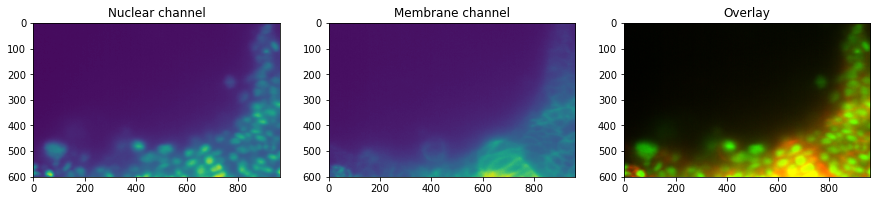

In [3]:
# select index for displaying
idx = 0

# plot the data
fig, ax = plt.subplots(1, 3, figsize=(15, 15))
ax[0].imshow(X_total[idx, ..., 0])
ax[1].imshow(X_total[idx, ..., 1])
ax[2].imshow(plot.image_to_rgb(X_total[idx,:,:,:], channels = [2,1]))

ax[0].set_title('Nuclear channel')
ax[1].set_title('Membrane channel')
ax[2].set_title('Overlay')

plt.show()

In [26]:
import extCellposeTest
# make a prediction using cellpose, then compare overlay with the prediction on top
# maybe use show_segmentation function
#model = models.Cellpose(gpu=True, model_type='cyto')
#model = models.Cellpose(gpu=True, model_type='cyto2') #makes more default segmentations, but lines are not as crisp as cyto

model = extCellposeTest.Cellpose(gpu=True, model_type='cyto2') # model = Cellpose object = a class inside models.py or extCellposeTest.py
# extCellposeTest (see extCellposeTest.py) overrides and adds some functionality to default API


#model_new = models.CellposeModel(gpu=True, model_type='tissuenet') #doesn't get the membranes very well even with higher flow.
# tissuenet really feels more like a nuclear segmentator


In [29]:
import extCellposeTest
chan = [2,1]
diam=47 # open image in FIJI, draw line segment on a median sized cell, analyze > measure to get pixel count
img = X_total
#masks, flows, styles, _ = model.eval(img, diameter=diam, flow_threshold = 0.6, do_3D=False, \
#                                             z_axis = 0, stitch_threshold=0.8, channels=chan)
masks, flows, styles, _ = model.eval_test(img, diameter=diam, flow_threshold = 0.6, do_3D=False, \
                                             z_axis = 0, stitch_threshold=0.8, channels=chan)
# takes 4m15s to run on lab computer, single timepoint, 335x601x961
#masks, flows, styles, _ = model.eval(img, diameter=diam, do_3D=True, \
#                                             z_axis = 0, channels=chan)
## This runs the code with the 2D algorithm, stitching slices 
#   as described here https://cellpose.readthedocs.io/en/latest/inputs.html 

np.save(outputFolder+'output_masks.npy', masks)
np.save(outputFolder+'output_outlines.npy',utils.masks_to_outlines(masks))

AttributeError: 'Cellpose' object has no attribute 'eval_test'

(335, 601, 961, 2)
68 34 2
0 0
1 10
2 20
3 30
4 40
5 50
6 60
7 70
8 80
9 90
10 100
11 110
12 120
13 130
14 140
15 150
16 160
17 170
18 180
19 190
20 200
21 210
22 220
23 230
24 240
25 250
26 260
27 270
28 280
29 290
30 300
31 310
32 320
33 330
39 19 2
0 0
1 50
2 100
3 150
4 200
5 250
6 300
7 350
8 400
9 450
10 500
11 550
12 600
13 650
14 700
15 750
16 800
17 850
18 900
19 950


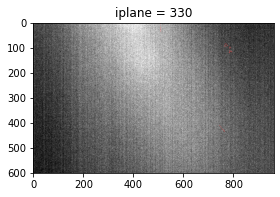

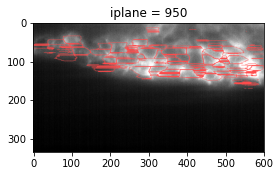

In [12]:
print(np.shape(img))
showPlots = True
if (showPlots):
    # plot in XY 
    zskip = 10
    yskip = 50

    # decide how to arrange subplots
    totalNumberOfPlots = int(2* numPlanes / zskip) + 1 
    numberOfColumns = int(totalNumberOfPlots/2)
    numberOfRows = int(totalNumberOfPlots/numberOfColumns)
    print(totalNumberOfPlots, numberOfColumns, numberOfRows)


    # set image slice to rgb, overlay the mask as an outline onto original image and display in subplot
    plt.figure(figsize=(4,4), tight_layout=True)
    for i,iplane in enumerate(np.arange(0,numPlanes,zskip,int)):
        print(i, iplane)
        img0 = plot.image_to_rgb(img[iplane, :, :, 1].copy(), channels=[2])
        #plt.subplot(numberOfRows,numberOfColumns,i+1)
        outlines = utils.masks_to_outlines(masks[iplane])
        outX, outY = np.nonzero(outlines)
        imgout= img0.copy()
        imgout[outX, outY] = np.array([255,75,75])
        plt.imshow(imgout)
        plt.title('iplane = %d'%iplane)
        #plt.subplot(numberOfRows,numberOfColumns, (i+numberOfColumns+1)) 
        #plt.imshow(masks[iplane])
        plt.savefig(outputFolder+"test3D_XY" + str(i) + ".jpg", dpi=200)


    # plot in XZ: this is REALLY important to check cells are being assigned correctly 

    # decide how to arrange subplots
    totalNumberOfPlots = int(2* numYPlanes / yskip) + 1
    numberOfColumns = int(totalNumberOfPlots/2)
    numberOfRows = int(totalNumberOfPlots/numberOfColumns)
    print(totalNumberOfPlots, numberOfColumns, numberOfRows)

    # set image slice to rgb, overlay the mask as an outline onto original image and display in subplot
    plt.figure(figsize=(4,4), tight_layout=True)
    for i,iplane in enumerate(np.arange(0,numYPlanes,yskip,int)):
        print(i, iplane)
        img0 = plot.image_to_rgb(img[:, :, iplane, 1].copy(), channels=[2])
        #plt.subplot(numberOfRows,numberOfColumns,i+1)
        outlines = utils.masks_to_outlines(masks[:, :, iplane])
        #print(np.shape(masks), np.shape(masks[:, :, iplane]))
        outX, outY = np.nonzero(outlines)
        imgout= img0.copy()
        imgout[outX, outY] = np.array([255,75,75])
        plt.imshow(imgout)
        plt.title('iplane = %d'%iplane)
        #plt.subplot(numberOfRows,numberOfColumns, (i+numberOfColumns+1)) 
        #plt.imshow(masks[:, :, iplane])
        plt.savefig(outputFolder+"test3D_XZ" + str(i) + ".jpg", dpi=200)


In [13]:
!jupyter --version
!python --version
import napari
img_4D = io.imread("WT_data_sample_movie_3-1_single_timepoint.tif")[:,0,:,:]
masks = np.load(outputFolder + "output_masks.npy") # you may need imread if these are tiffs 
outlines = np.load(outputFolder + "output_outlines.npy") # you may need imread if these are tiffs 

viewer = napari.Viewer() 
viewer.add_image(img_4D) 
viewer.add_labels(masks) 
viewer.add_labels(outlines)

Selected Jupyter core packages...

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'



IPython          : 8.4.0
ipykernel        : 6.9.1
ipywidgets       : 7.6.5
jupyter_client   : 7.2.2
jupyter_core     : 4.10.0
jupyter_server   : not installed
jupyterlab       : not installed
nbclient         : 0.5.13
nbconvert        : 6.4.4
nbformat         : 5.3.0
notebook         : 6.4.12
qtconsole        : 5.3.1
traitlets        : 5.1.1
Python 3.8.13


100%|██████████████████████████████████████████████████████████████████████████████| 670/670 [00:00<00:00, 1141.74it/s]


<Labels layer 'Labels' at 0x24d7538ce50>

In [8]:
print(np.shape(img_4D))
print(np.shape(masks))

(335, 601, 961)
(335, 601, 961)


In [9]:
A = np.zeros((5,5))
print(A)
print(not A.size)
print(A.size)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
False
25


In [22]:
import extCellposeTest